Game engine Classification 
Data: GameEngines https://www.kaggle.com/datasets/igalbronshtein/game-engines?resource=download

IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [108]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('engines.csv')
df


,name,facebook,facebook_likes,facebook_followers,twitter,youtube,youtube_subscribers,youtube_videos,tiktok,snapchat,...,g2_reviews,producthunt,capterra,capterra_stars,capterra_ratings_num,similarweb,similarweb_total_visits,similarweb_bounce_rate,similarweb_pages_visit,similarweb_avg_visit
0,Clickteam Fusion,https://www.facebook.com/clickteam,11K,11K,http://twitter.com/clickteam,https://www.youtube.com/@ClickteamLLC,56.6K,372,x,x,...,x,x,https://www.capterra.com/p/250587/Clickteam-Fu...,x,x,https://www.similarweb.com/website/clickteam.c...,102.8K,46.70,3.24,00:02:05
1,Construct 3,https://www.facebook.com/ConstructTeam,23K,23K,https://twitter.com/ConstructTeam,https://www.youtube.com/c/Construct,15.5K,293,x,x,...,22,x,https://www.capterra.com/p/201543/Construct-3,4.7,208,https://www.similarweb.com/website/construct.n...,910.7K,43.18,6.43,00:11:41
2,CryEngine,https://www.facebook.com/cryengineofficial,43K,43K,https://twitter.com/cryengine,https://www.youtube.com/cryengine,50.1K,355,x,x,...,16,x,https://www.capterra.com/p/210664/CRYENGINE,4.8,6,https://www.similarweb.com/website/cryengine.c...,115.2K,54.23,2.60,00:01:45
3,Game Maker,https://www.facebook.com/GameMakerEngine,255K,256K,https://twitter.com/GameMakerEngine,https://www.youtube.com/@GameMakerEngine,62.6K,155,x,x,...,32,x,https://www.capterra.com/p/158594/GameMaker-St...,4.4,91,https://www.similarweb.com/website/gamemaker.i...,1.3M,45.51,3.66,00:04:43
4,GameSalad,https://www.facebook.com/gamesalad,7.1K,7K,https://twitter.com/gamesalad,https://www.youtube.com/@gamesalad,8.69K,70,x,x,...,15,x,https://www.capterra.com/p/158595/GameSalad,4.1,23,https://www.similarweb.com/website/gamesalad.c...,111.7K,52.96,6.21,00:06:19
5,Gdevelop,https://www.facebook.com/GDevelopApp,3.2K,4.4K,https://twitter.com/GDevelopApp,https://www.youtube.com/@GDevelopApp,21.8K,118,https://www.tiktok.com/@gdevelop,x,...,18,https://www.producthunt.com/products/gdevelop,https://www.capterra.com/p/158592/GDevelop,4.8,8,https://www.similarweb.com/website/gdevelop.io...,507.7K,38.53,6.18,00:07:08
6,Godot,https://www.facebook.com/godotdevelopers,7.5K,8.6K,https://twitter.com/godotengine,https://www.youtube.com/@GodotEngineOfficial,54.5K,88,x,x,...,19,https://www.producthunt.com/products/godot#godot,https://www.capterra.com/p/234843/Godot-Engine,4.5,12,https://www.similarweb.com/website/godotengine...,1.8M,43.32,3.85,00:05:39
7,Open 3D Engine,https://www.facebook.com/Open3DEngine,79,92,https://twitter.com/o3dengine,https://www.youtube.com/channel/UCTC8GDw1XidOT...,3.84K,154,x,x,...,x,x,x,x,x,https://www.similarweb.com/website/o3de.org/#o...,52.4K,45.90,4.11,00:04:50
8,PlayCanvas,https://www.facebook.com/playcanvas,1.4K,1.5K,https://twitter.com/playcanvas,https://www.youtube.com/@playcanvas,2.98K,52,x,x,...,6,https://www.producthunt.com/products/playcanvas,https://www.capterra.com/p/210379/PlayCanvas,x,x,https://www.similarweb.com/website/playcanvas....,315.3K,36.48,7.24,00:11:55
9,Stencyl,https://www.facebook.com/stencyl,8.1K,8.1K,https://twitter.com/Stencyl,x,x,x,x,x,...,12,https://www.producthunt.com/products/stencyl,https://www.capterra.com/p/158598/Stencyl,4.5,11,https://www.similarweb.com/website/stencyl.com...,55.8K,44.16,1.98,00:04:43


DataExploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       12 non-null     object 
 1   facebook                   12 non-null     object 
 2   facebook_likes             12 non-null     object 
 3   facebook_followers         12 non-null     object 
 4   twitter                    12 non-null     object 
 5   youtube                    12 non-null     object 
 6   youtube_subscribers        12 non-null     object 
 7   youtube_videos             12 non-null     object 
 8   tiktok                     12 non-null     object 
 9   snapchat                   12 non-null     object 
 10  linkedin                   12 non-null     object 
 11  wikipedia                  12 non-null     object 
 12  wikipedia_languages_num    12 non-null     int64  
 13  site                       12 non-null     object 
 

In [5]:
df.describe()

,wikipedia_languages_num,alternativeto_likes,similarweb_bounce_rate,similarweb_pages_visit
count,12.000000,12.000000,12.000000,12.000000
mean,18.250000,119.750000,44.224167,4.844167
std,18.708894,139.313985,5.390457,1.865395
min,2.000000,10.000000,36.480000,1.980000
25%,4.000000,33.750000,40.020000,3.555000
50%,7.000000,64.000000,43.740000,4.570000
75%,28.750000,158.000000,46.100000,6.265000
max,53.000000,449.000000,54.230000,7.600000


In [6]:
numeric_columns = df.describe().columns.to_list()

In [7]:
df.describe(include=[object])

,name,facebook,facebook_likes,facebook_followers,twitter,youtube,youtube_subscribers,youtube_videos,tiktok,snapchat,...,g2,g2_stars,g2_reviews,producthunt,capterra,capterra_stars,capterra_ratings_num,similarweb,similarweb_total_visits,similarweb_avg_visit
count,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
unique,12,12,12,12,12,12,12,12,2,1,...,11,7,11,7,12,7,10,12,12,11
top,Clickteam Fusion,https://www.facebook.com/clickteam,11K,11K,http://twitter.com/clickteam,https://www.youtube.com/@ClickteamLLC,56.6K,372,x,x,...,x,4.5,x,x,https://www.capterra.com/p/250587/Clickteam-Fu...,x,x,https://www.similarweb.com/website/clickteam.c...,102.8K,00:04:43
freq,1,1,1,1,1,1,1,1,11,12,...,2,4,2,6,1,3,3,1,1,2


In [8]:
for col in [col for col in df if df[col].isna().sum() > (0.2 * df.shape[0])]:
    print(f"{col} - Missing values: {(df[col].isna().sum() / df.shape[0]):.2f} %")

In [9]:
categorical_columns = []
binary_columns = []

Separate the columns by type - numerical and categorical.

In [10]:
for column in df:
    column_type = df[column].dtype
    unique_values = df[column].unique()
    count_unique_values = len(unique_values)

    if count_unique_values < 10:
        if count_unique_values == 2:
            binary_columns.append(column)
        else:
            categorical_columns.append(column)
            
        print(f'{column:20} | {column_type} | {count_unique_values:5} | {unique_values}')

tiktok               | object |     2 | ['x' 'https://www.tiktok.com/@gdevelop']
snapchat             | object |     1 | ['x']
github               | object |     9 | ['x' 'https://github.com/Scirra' 'https://github.com/CRYTEK'
 'https://github.com/GDevelopApp' 'https://github.com/godotengine'
 'https://github.com/o3de' 'https://github.com/playcanvas'
 'https://github.com/Unity-Technologies' 'https://github.com/EpicGames']
github_followers     | object |     9 | ['x' '6' '233' '46' '3k' '223' '239' '6k' '18.7k']
alternativeto_stars  | object |     7 | ['5' '4.9' 'x' '4.5' '4.8' '2' '3.8']
alternativeto_ratings_num | object |     7 | ['1' '29' '2' 'x' '12' '33' '8']
g2_stars             | object |     7 | ['x' '4' '3.7' '4.1' '4.4' '4.5' '4.6']
producthunt          | object |     7 | ['x' 'https://www.producthunt.com/products/gdevelop'
 'https://www.producthunt.com/products/godot#godot'
 'https://www.producthunt.com/products/playcanvas'
 'https://www.producthunt.com/products/stencyl'
 '

In [11]:

# remove categorical columns from numeric
for column in categorical_columns:
    if column in numeric_columns:
        numeric_columns.remove(column)

# remove binary columns from numeric
for column in binary_columns:
    if column in numeric_columns:
        numeric_columns.remove(column)



In [12]:
# 
#try:

#except ValueError:
#    print("Item doesn't exist on the list")
for x in range(len(categorical_columns)):
    print (categorical_columns[x],)

snapchat
github
github_followers
alternativeto_stars
alternativeto_ratings_num
g2_stars
producthunt
capterra_stars


In [13]:
#remove columns with a single unique value from categorical
categorical_columns.remove('snapchat')
categorical_columns.remove('github')
categorical_columns.remove('producthunt')

In [14]:


for col in [col for col in df if df[col].unique().shape[0] > (0.2 * df.shape[0])]:
    print(f"{col} - Unique values: {(df[col].unique().shape[0] / df.shape[0]):.2f} %")



name - Unique values: 1.00 %
facebook - Unique values: 1.00 %
facebook_likes - Unique values: 1.00 %
facebook_followers - Unique values: 1.00 %
twitter - Unique values: 1.00 %
youtube - Unique values: 1.00 %
youtube_subscribers - Unique values: 1.00 %
youtube_videos - Unique values: 1.00 %
linkedin - Unique values: 1.00 %
wikipedia - Unique values: 1.00 %
wikipedia_languages_num - Unique values: 0.83 %
site - Unique values: 1.00 %
github - Unique values: 0.75 %
github_followers - Unique values: 0.75 %
alternativeto - Unique values: 1.00 %
alternativeto_likes - Unique values: 0.92 %
alternativeto_stars - Unique values: 0.58 %
alternativeto_ratings_num - Unique values: 0.58 %
g2 - Unique values: 0.92 %
g2_stars - Unique values: 0.58 %
g2_reviews - Unique values: 0.92 %
producthunt - Unique values: 0.58 %
capterra - Unique values: 1.00 %
capterra_stars - Unique values: 0.58 %
capterra_ratings_num - Unique values: 0.83 %
similarweb - Unique values: 1.00 %
similarweb_total_visits - Unique v

In [15]:
for col in numeric_columns:
    skewness = df[col].skew()
    std = df[col].std()

    l_skewness = np.log1p(df[col]).skew()
    l_std = np.log1p(df[col]).std()

    if skewness > 0.5 and np.abs(l_skewness) <= 0.5:
        print(f'{col:30} | Skw: {skewness:10.2f} => {l_skewness:.2f}')

    if std > 1 and l_std <= 1:
        print(f'{col:30} | Std: {std:10.2f} => {l_std:.2f}')

wikipedia_languages_num        | Skw:       0.97 => 0.30
alternativeto_likes            | Skw:       1.65 => 0.09
similarweb_bounce_rate         | Skw:       0.61 => 0.37
similarweb_bounce_rate         | Std:       5.39 => 0.12
similarweb_pages_visit         | Std:       1.87 => 0.34


Plots

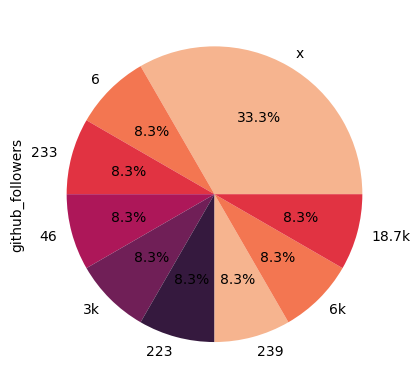

In [16]:
sns.set_palette('rocket_r')
df['github_followers'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

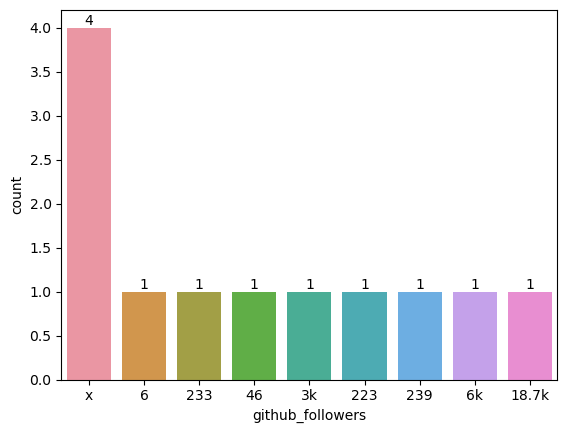

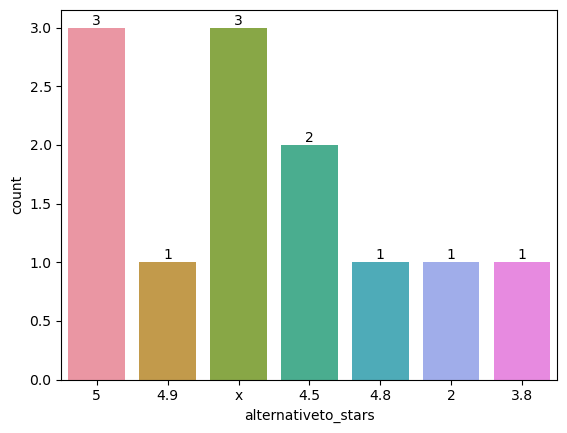

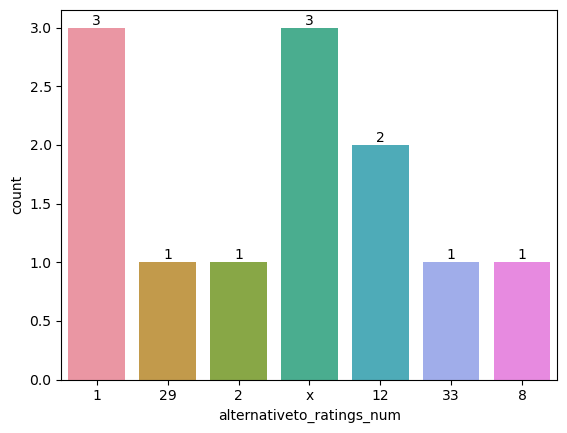

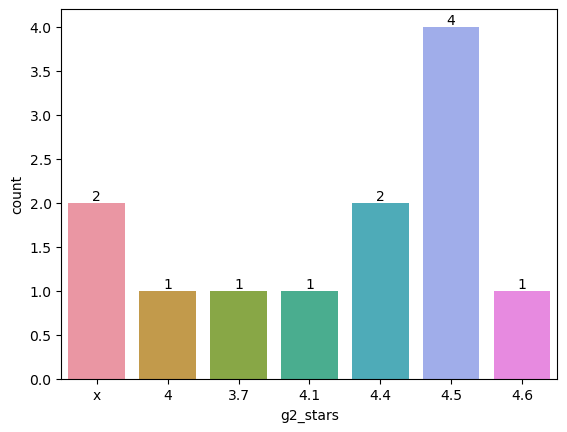

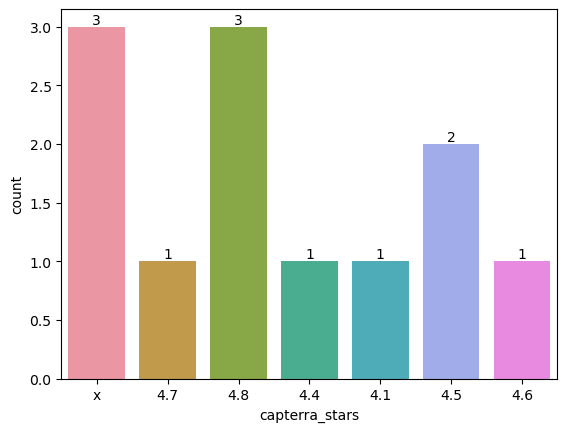

In [17]:
for column in categorical_columns:
    sns.set_palette('flare')
    p = sns.countplot(data=df, x=column)
    p.bar_label(p.containers[0])
    plt.show()

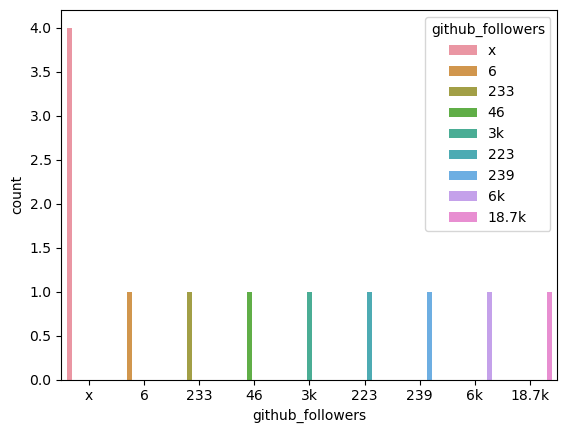

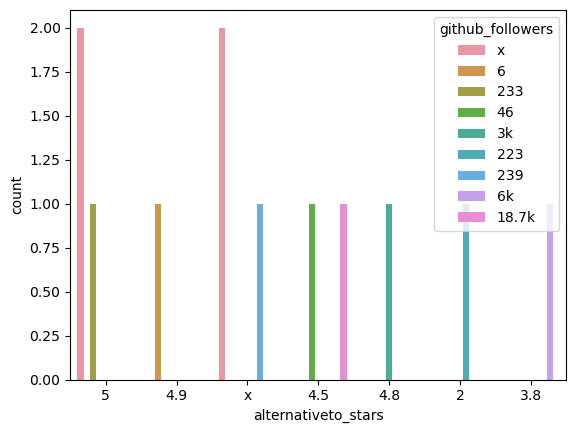

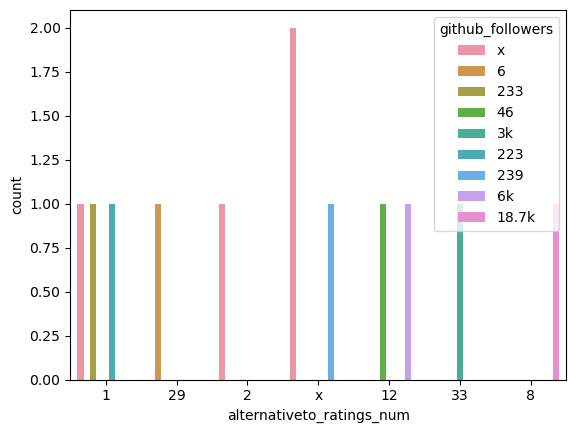

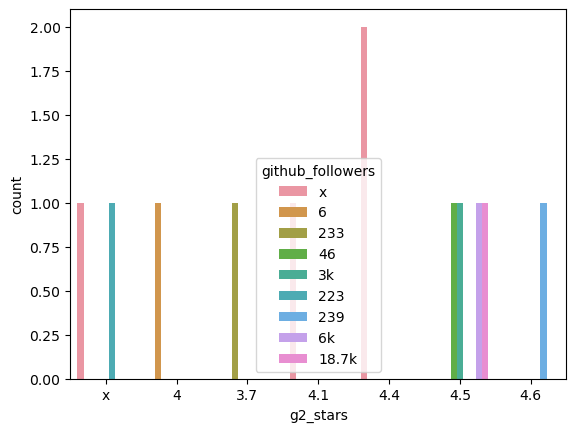

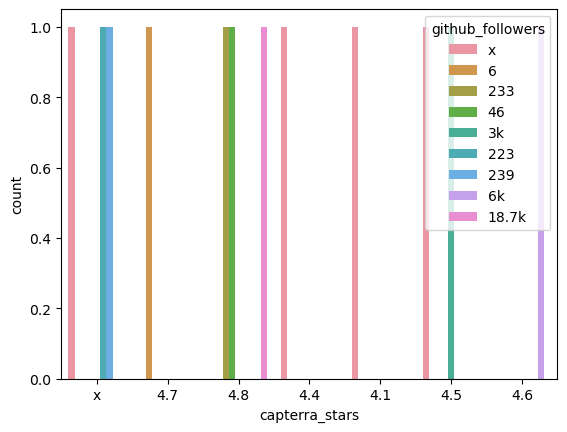

In [18]:
for column in categorical_columns:
    sns.set_palette('flare')
    p = sns.countplot(data=df, x=column, hue='github_followers')
    plt.show()

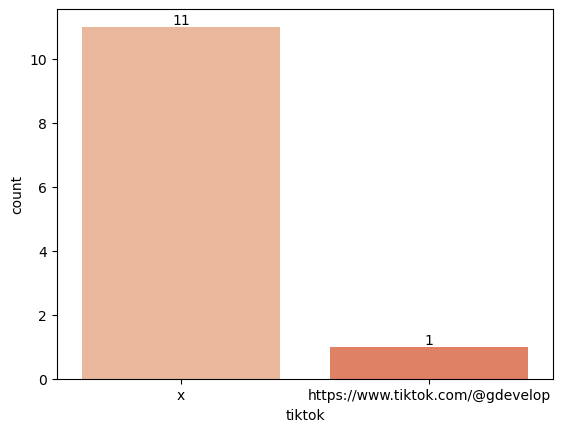

In [19]:


for column in binary_columns:
    sns.set_palette('rocket_r')
    p = sns.countplot(data=df, x=column)
    p.bar_label(p.containers[0])
    plt.show()



In [20]:
df.dtypes

name                          object
facebook                      object
facebook_likes                object
facebook_followers            object
twitter                       object
youtube                       object
youtube_subscribers           object
youtube_videos                object
tiktok                        object
snapchat                      object
linkedin                      object
wikipedia                     object
wikipedia_languages_num        int64
site                          object
github                        object
github_followers              object
alternativeto                 object
alternativeto_likes            int64
alternativeto_stars           object
alternativeto_ratings_num     object
g2                            object
g2_stars                      object
g2_reviews                    object
producthunt                   object
capterra                      object
capterra_stars                object
capterra_ratings_num          object
s

In [21]:
df.columns

Index(['name', 'facebook', 'facebook_likes', 'facebook_followers', 'twitter',
       'youtube', 'youtube_subscribers', 'youtube_videos', 'tiktok',
       'snapchat', 'linkedin', 'wikipedia', 'wikipedia_languages_num', 'site',
       'github', 'github_followers', 'alternativeto', 'alternativeto_likes',
       'alternativeto_stars', 'alternativeto_ratings_num', 'g2', 'g2_stars',
       'g2_reviews', 'producthunt', 'capterra', 'capterra_stars',
       'capterra_ratings_num', 'similarweb', 'similarweb_total_visits',
       'similarweb_bounce_rate', 'similarweb_pages_visit',
       'similarweb_avg_visit'],
      dtype='object')

In [22]:
# Анонимизиране 
df.drop(columns=['name', 'facebook', 'twitter', 'youtube'], inplace=True)

In [23]:
# Премахване на неважна информация 

df.drop(columns=['tiktok',
       'snapchat', 'linkedin', 'wikipedia', 'wikipedia_languages_num', 'site',
       'github', 'alternativeto', 'g2', 
       'g2_reviews', 'producthunt', 'capterra','similarweb'], inplace=True)



In [24]:
df

,facebook_likes,facebook_followers,youtube_subscribers,youtube_videos,github_followers,alternativeto_likes,alternativeto_stars,alternativeto_ratings_num,g2_stars,capterra_stars,capterra_ratings_num,similarweb_total_visits,similarweb_bounce_rate,similarweb_pages_visit,similarweb_avg_visit
0,11K,11K,56.6K,372,x,39,5,1,x,x,x,102.8K,46.70,3.24,00:02:05
1,23K,23K,15.5K,293,6,81,4.9,29,4,4.7,208,910.7K,43.18,6.43,00:11:41
2,43K,43K,50.1K,355,233,58,5,1,3.7,4.8,6,115.2K,54.23,2.60,00:01:45
3,255K,256K,62.6K,155,x,39,5,2,4.1,4.4,91,1.3M,45.51,3.66,00:04:43
4,7.1K,7K,8.69K,70,x,13,x,x,4.4,4.1,23,111.7K,52.96,6.21,00:06:19
5,3.2K,4.4K,21.8K,118,46,170,4.5,12,4.5,4.8,8,507.7K,38.53,6.18,00:07:08
6,7.5K,8.6K,54.5K,88,3k,449,4.8,33,4.5,4.5,12,1.8M,43.32,3.85,00:05:39
7,79,92,3.84K,154,223,18,2,1,x,x,x,52.4K,45.90,4.11,00:04:50
8,1.4K,1.5K,2.98K,52,239,10,x,x,4.6,x,x,315.3K,36.48,7.24,00:11:55
9,8.1K,8.1K,x,x,x,70,x,x,4.4,4.5,11,55.8K,44.16,1.98,00:04:43


In [25]:
df.dtypes

facebook_likes                object
facebook_followers            object
youtube_subscribers           object
youtube_videos                object
github_followers              object
alternativeto_likes            int64
alternativeto_stars           object
alternativeto_ratings_num     object
g2_stars                      object
capterra_stars                object
capterra_ratings_num          object
similarweb_total_visits       object
similarweb_bounce_rate       float64
similarweb_pages_visit       float64
similarweb_avg_visit          object
dtype: object

In [26]:
for col in ('facebook_likes','facebook_followers','youtube_subscribers','youtube_videos','github_followers','alternativeto_likes' ,'alternativeto_stars',
            'alternativeto_ratings_num','g2_stars','capterra_stars','capterra_ratings_num','similarweb_total_visits','similarweb_bounce_rate', 'similarweb_avg_visit'): 
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(value=0)

In [27]:
df.dtypes

facebook_likes               float64
facebook_followers           float64
youtube_subscribers          float64
youtube_videos               float64
github_followers             float64
alternativeto_likes            int64
alternativeto_stars          float64
alternativeto_ratings_num    float64
g2_stars                     float64
capterra_stars               float64
capterra_ratings_num         float64
similarweb_total_visits      float64
similarweb_bounce_rate       float64
similarweb_pages_visit       float64
similarweb_avg_visit         float64
dtype: object

In [28]:
df.describe()

,facebook_likes,facebook_followers,youtube_subscribers,youtube_videos,github_followers,alternativeto_likes,alternativeto_stars,alternativeto_ratings_num,g2_stars,capterra_stars,capterra_ratings_num,similarweb_total_visits,similarweb_bounce_rate,similarweb_pages_visit,similarweb_avg_visit
count,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.0
mean,69239.000000,71164.416667,0.0,138.083333,62.250000,119.750000,3.291667,8.250000,3.600000,3.433333,122.500000,0.0,44.224167,4.844167,0.0
std,239826.054258,246491.799648,0.0,134.322176,103.040261,139.313985,2.152571,11.568963,1.701871,2.079918,227.781594,0.0,5.390457,1.865395,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,36.480000,1.980000,0.0
25%,0.000000,0.000000,0.0,39.000000,0.000000,33.750000,1.500000,0.750000,3.925000,3.075000,4.500000,0.0,40.020000,3.555000,0.0
50%,0.000000,0.000000,0.0,103.000000,0.000000,64.000000,4.500000,1.500000,4.400000,4.500000,11.500000,0.0,43.740000,4.570000,0.0
75%,0.000000,0.000000,0.0,189.500000,90.250000,158.000000,4.925000,12.000000,4.500000,4.725000,120.250000,0.0,46.100000,6.265000,0.0
max,830789.000000,853881.000000,0.0,372.000000,239.000000,449.000000,5.000000,33.000000,4.600000,4.800000,757.000000,0.0,54.230000,7.600000,0.0


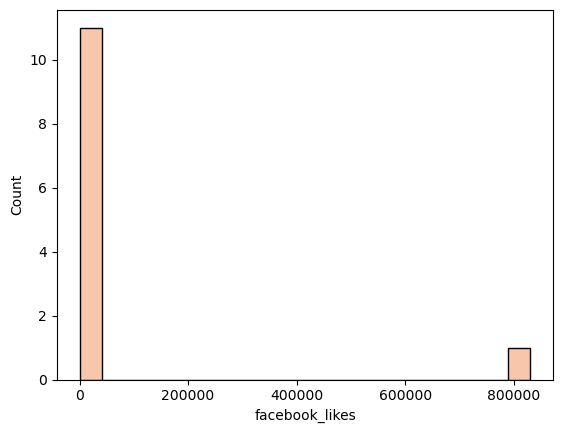

In [29]:
sns.histplot(df["facebook_likes"], bins=20);

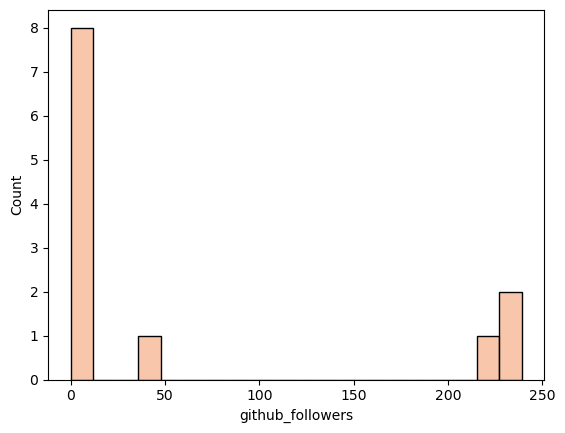

In [30]:
sns.histplot(df["github_followers"], bins=20);

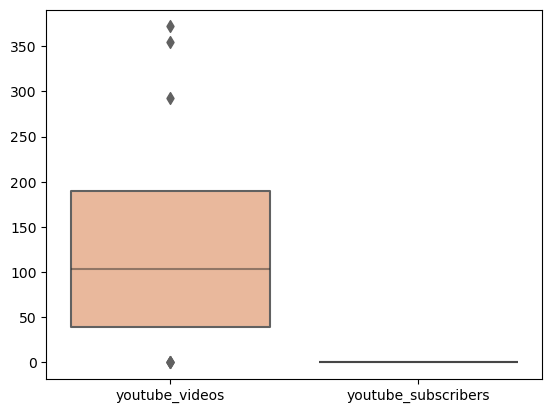

In [31]:
sns.boxenplot(data=df[["youtube_videos", "youtube_subscribers"]], scale='linear');

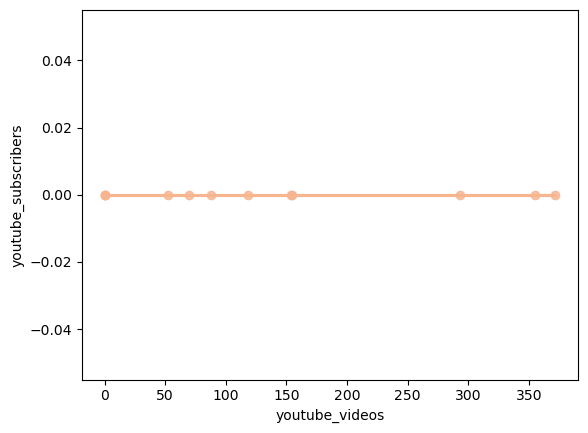

In [32]:
sns.regplot(x=df["youtube_videos"], y=df["youtube_subscribers"]);

In [33]:
def preprocess_inputs(df, scale=False):
    df = df.copy()

    # log some numerical columns
    log_columns = ['facebook_likes','facebook_followers','youtube_subscribers','youtube_videos','github_followers',
                   'similarweb_total_visits','similarweb_bounce_rate']
    for col in log_columns:
        df[col] = np.log1p(df[col])

    # one hot encode columns
    one_hot_columns = ['alternativeto_likes' ,'alternativeto_stars',
            'alternativeto_ratings_num','g2_stars','capterra_stars','capterra_ratings_num']
    dummies = pd.get_dummies(df[one_hot_columns])
    df = df.drop(one_hot_columns, axis=1)

    result = pd.concat([df, dummies], axis=1)

    X = result.drop(['alternativeto_likes'], axis=1)
    y = result['alternativeto_likes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13,  shuffle=True)

    if scale:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=True)

In [35]:
model = LogisticRegression()
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
y_testone=lab.fit_transform(y_test)
model.fit(X_train, y_transformed)


print("Train score:", model.score(X_train, y_transformed))
print("Test score: ", model.score(X_test, y_testone))


Train score: 1.0
Test score:  0.0


<Axes: >

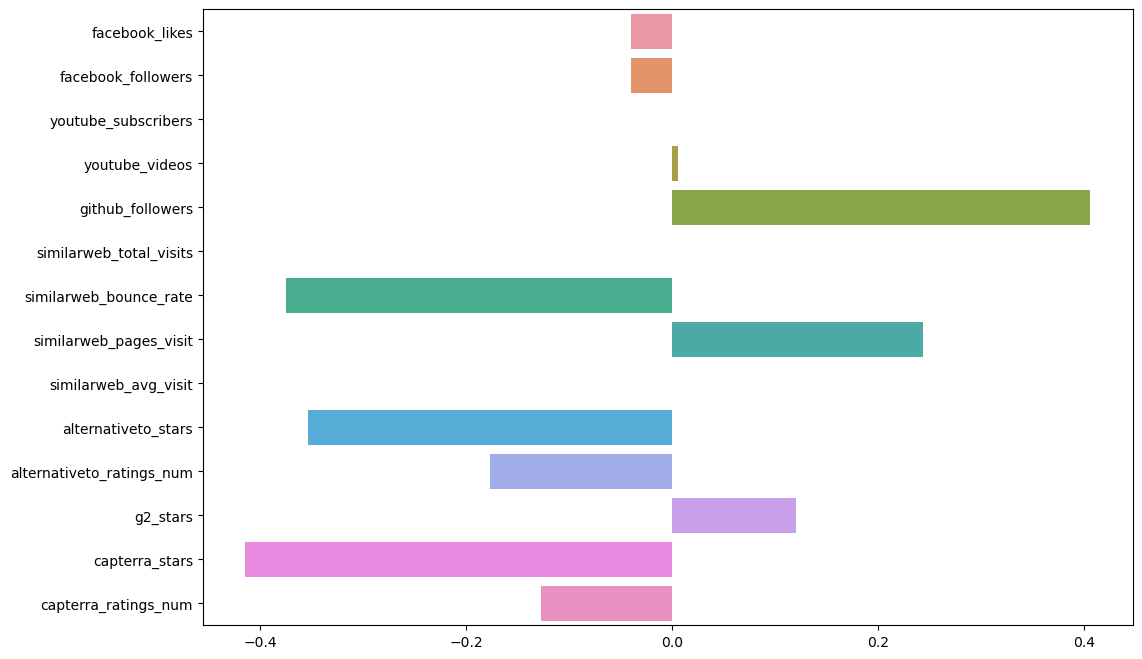

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_train.columns, orient='horizontal')

k =   1, train score = 1.00000, test score = 0.00000
k =   2, train score = 0.77778, test score = 0.33333
k =   3, train score = 0.66667, test score = 0.33333
k =   4, train score = 0.77778, test score = 0.00000
k =   5, train score = 0.44444, test score = 0.33333
k =   6, train score = 0.55556, test score = 0.33333
k =   7, train score = 0.55556, test score = 0.33333
k =   8, train score = 0.55556, test score = 0.66667
k =   9, train score = 0.55556, test score = 0.33333


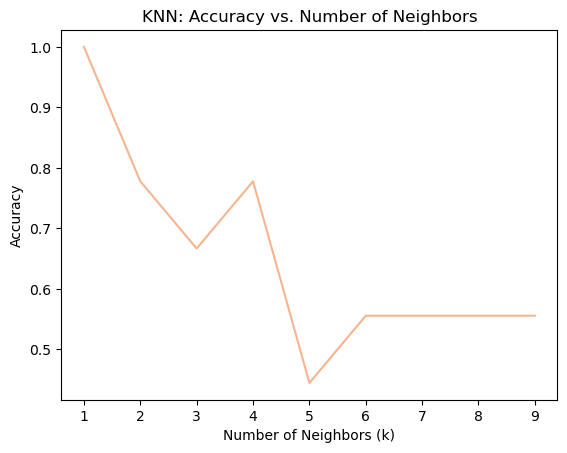

Best N value: 3
Best number of neighbors: 8
Best accuracy: 0.6666666666666666


In [156]:

# Изчисляване на минималните и максималните стойности за всяка характеристика
min_vals = np.min(df, axis=0)
max_vals = np.max(df, axis=0)
labels = np.array([0, 1, 0, 1, 0,1,0,1,0,1,0,1])  # Примерни метки за класове
# Използвайте SimpleImputer за заместване на NaN стойностите
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(imputed_data, labels, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Initialize variables
best_score = -1
best_n = None
scores = {}
train_scores = []
test_scores = []

# Iterate over different values of k (number of neighbors)
for n in range(1, len(X_train)+1):
    # Create and train the KNN model
    current_model = KNeighborsClassifier(n_neighbors=n)
    current_model.fit(X_train, y_train)
    train_score = current_model.score(X_train, y_train)
    test_score = current_model.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

    # Calculate the accuracy on the test set
    score = current_model.score(X_test, y_test)

    # Track the best model and its accuracy
    if score > best_score:
        best_score = score
        best_n = n

    scores[n] = train_score
    print("k = {:3}, train score = {:1.5f}, test score = {:1.5f}".format(n, train_score, test_score))

# Plot the aclabels = np.array([0, 1, 0])  # Примерни метки за класовеcuracy for different values of k
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs. Number of Neighbors')
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))
print('Best number of neighbors:', best_n)
print('Best accuracy:', best_score)

In [151]:
def plot_knn_scores(ks):
    train_scores = []
    test_scores = []
    
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)

    plt.figure(figsize=(10, 6))
    plt.plot(ks, train_scores, color='blue', label='train score')
    plt.plot(ks, test_scores, color='green', label='test score')
    plt.legend()


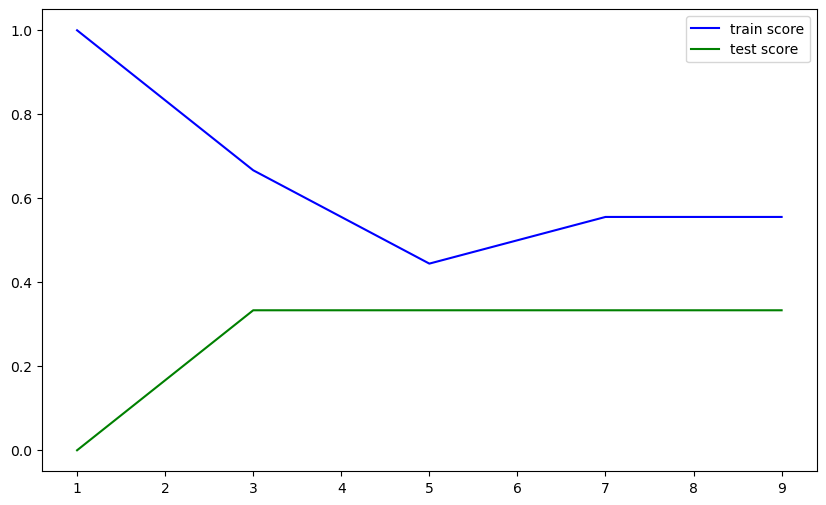

In [152]:
plot_knn_scores(range(1, 10, 2))

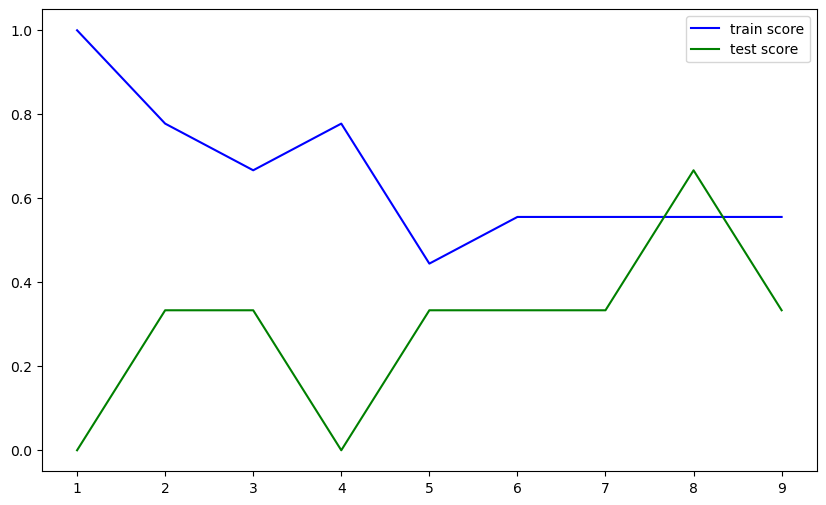

In [158]:
plot_knn_scores(range(1, 10))

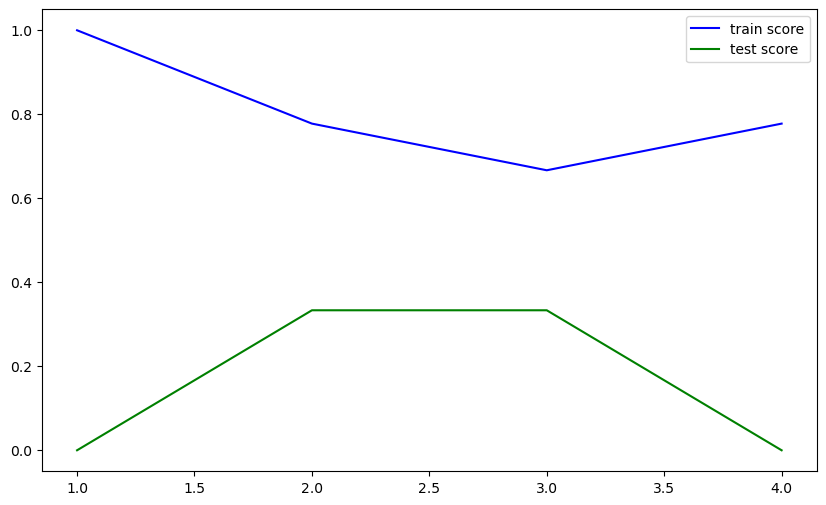

In [131]:
plot_knn_scores(range(1, 5))

In [159]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)

In [160]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

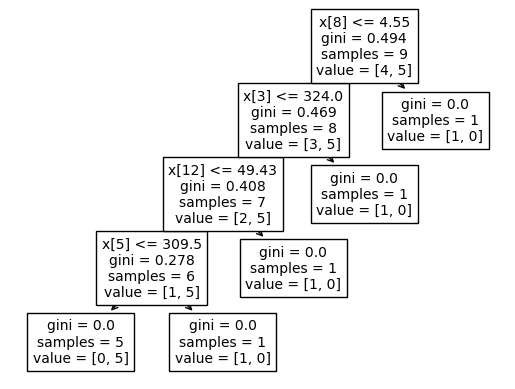

In [161]:
plot_tree(model)
plt.show()


In [162]:


y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



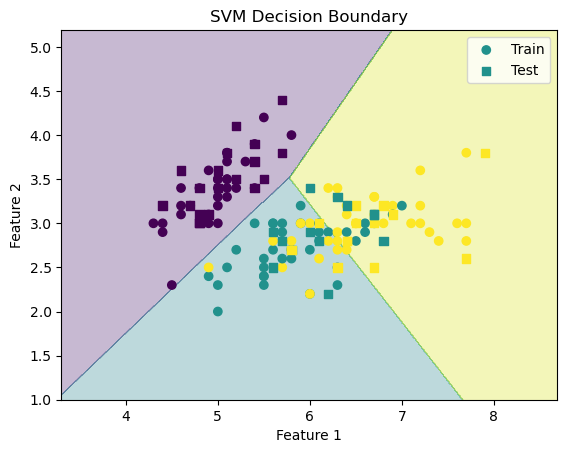

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

# Create a meshgrid to plot the decision boundary

criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    current_model.fit(X_train, y_train)
    y_pred = current_model.predict(X_test)

    if f1_score(y_test, y_pred) > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred)


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the meshgrid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVM Decision Boundary')
plt.show()


Linear SVM Accuracy: 0.7333333333333333
Polynomial SVM Accuracy: 0.7555555555555555
RBF SVM Accuracy: 0.7333333333333333
Sigmoid SVM Accuracy: 0.7777777777777778


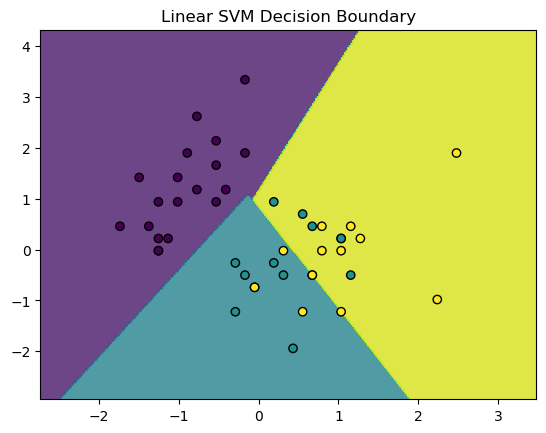

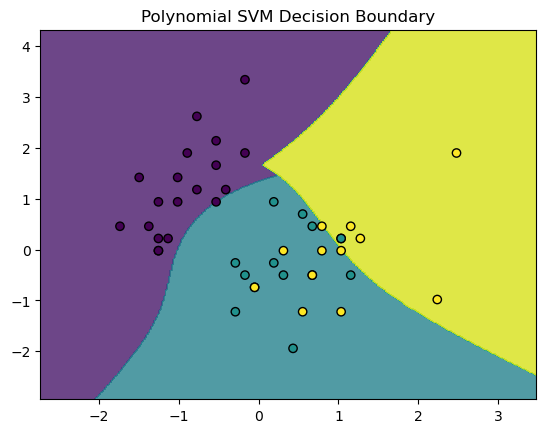

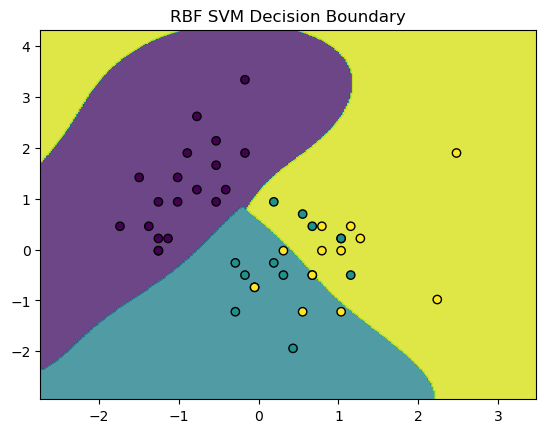

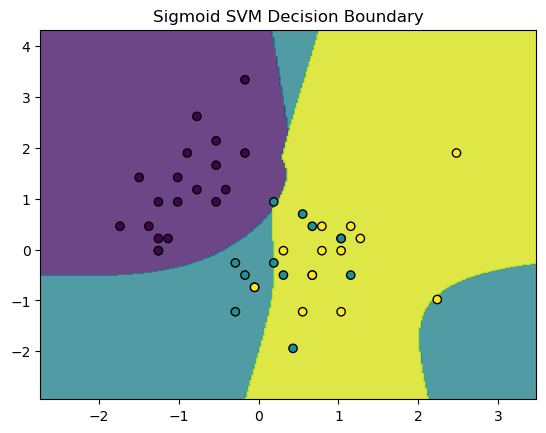

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Нормализация на данните
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Създаване на моделите с различни ядра
linear_svm = SVC(kernel='linear')
poly_svm = SVC(kernel='poly', degree=3)  # Полином с трета степен
rbf_svm = SVC(kernel='rbf')
sigmoid_svm = SVC(kernel='sigmoid')

# Обучение на моделите
linear_svm.fit(X_train, y_train)
poly_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
sigmoid_svm.fit(X_train, y_train)

# Оценка на точността на моделите
linear_score = linear_svm.score(X_test, y_test)
poly_score = poly_svm.score(X_test, y_test)
rbf_score = rbf_svm.score(X_test, y_test)
sigmoid_score = sigmoid_svm.score(X_test, y_test)

# Извеждане на резултатите
print(f'Linear SVM Accuracy: {linear_score}')
print(f'Polynomial SVM Accuracy: {poly_score}')
print(f'RBF SVM Accuracy: {rbf_score}')
print(f'Sigmoid SVM Accuracy: {sigmoid_score}')

# Визуализация на решаващите граници (за две функции)
def plot_decision_boundary(model, X, y, title):
    h = .02  # Шаг на мрежата
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
    plt.title(title)
    plt.show()

# Визуализация на решаващите граници за всяко ядро
plot_decision_boundary(linear_svm, X_test, y_test, 'Linear SVM Decision Boundary')
plot_decision_boundary(poly_svm, X_test, y_test, 'Polynomial SVM Decision Boundary')
plot_decision_boundary(rbf_svm, X_test, y_test, 'RBF SVM Decision Boundary')
plot_decision_boundary(sigmoid_svm, X_test, y_test, 'Sigmoid SVM Decision Boundary')
